In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# define example function
def f(x):
    return np.sin(x) + 0.5 *x

In [8]:
x = np.linspace(-2* np.pi, 2*np.pi, 50)

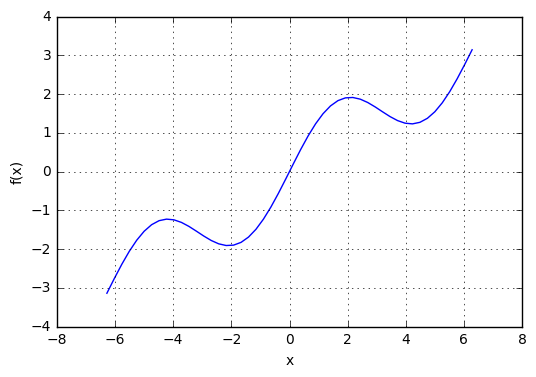

In [9]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [12]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

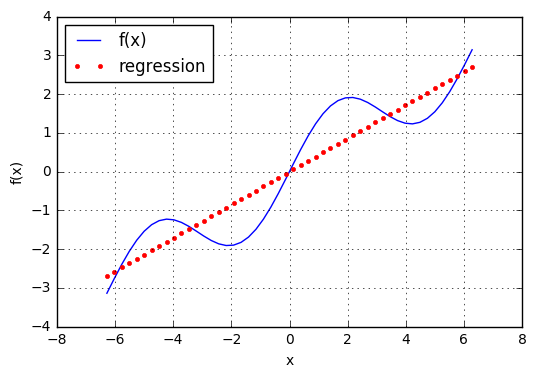

In [13]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

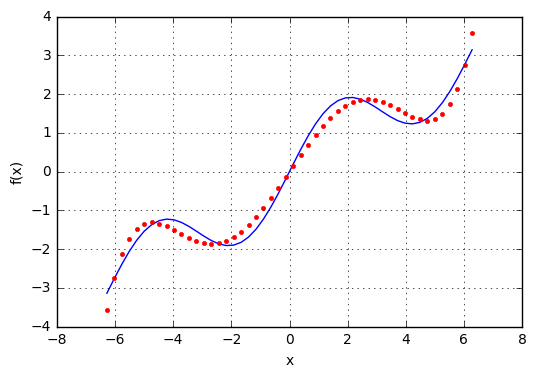

In [14]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
plt.plot(x, f(x), 'b',label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

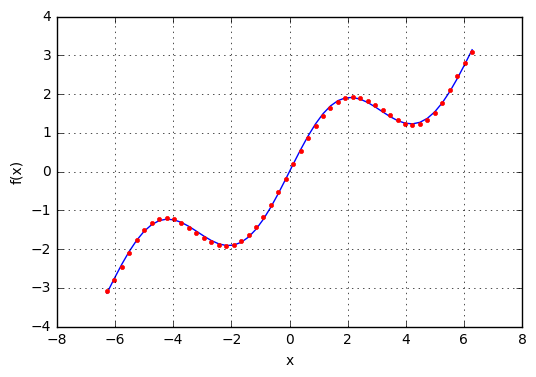

In [15]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)
plt.plot(x, f(x), 'b',label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [16]:
np.allclose(f(x),ry)

False

In [17]:
np.sum((f(x) - ry) **2) / len(x)

0.0017769134759517721

In [18]:
# In general, you can reach better regression results when you can choose better sets of basis
# functions.
matrix = np.zeros((3+1, len(x)))
matrix[3, :] = x **3
matrix[2, :] = x**2
matrix[1, :] = x
matrix[0, :] = 1

In [19]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [20]:
reg

array([  1.52685368e-14,   5.62777448e-01,  -1.11022302e-15,
        -5.43553615e-03])

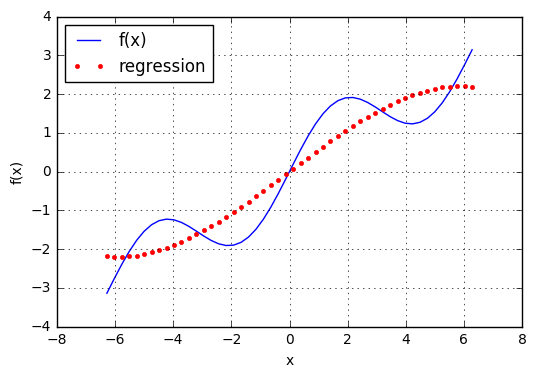

In [23]:
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [24]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

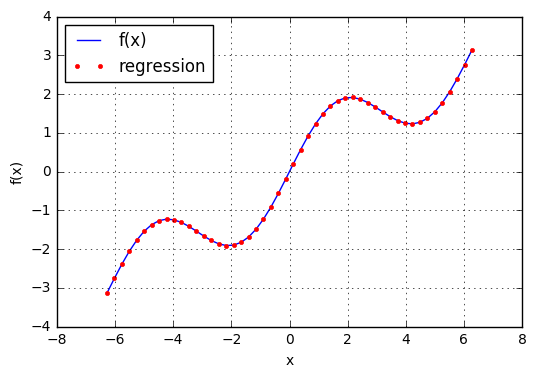

In [25]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [27]:
# Indeed the regression now is 'perfect' in a numerical sense:
np.allclose(f(x), ry)

True

In [32]:
np.sum((f(x) - ry) ** 2 ) /len(x)

2.1781497299041883e-31

In [33]:
# Noisy data
# Regression can cope equally well with noisy data, be it daa from simulation or from meanusrements.

In [34]:
xn = np.linspace(-2* np.pi, 2* np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [37]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg,xn)

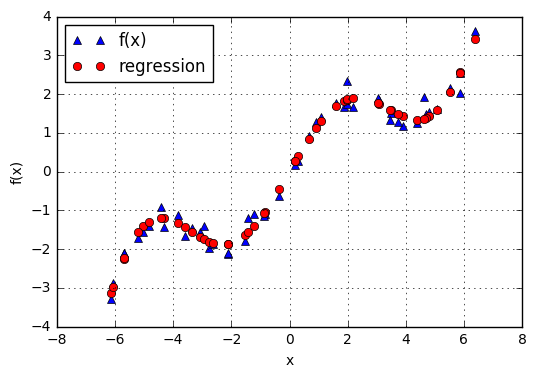

In [38]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')